### ERROR

If you are getting the **utf-8' codec can't decode byte 0xcc invalid continuation byte pandas** error then do this:

*, encoding = "ISO-8859-1", engine='python')*

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #hata değerleri için silhuette score kullanılıyor mesela regression için r kare kullanıyorduk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import chardet
with open('data.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

def is_not_ascii(string):
    return string is not None and any([ord(s) >= 128 for s in string])

df[df[col].apply(is_not_ascii)]

In [3]:
df=pd.read_csv('data.csv',encoding='latin1')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20,33,73,106,158) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,NaN,...,5.0,NaN,NaN,Aluminum,NaN,NaN,NaN,PF04829,3.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [6]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [7]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,...,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4194.000000,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,...,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1796.518121,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,...,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
std,1065.679090,1.887681e+07,0.0,0.141196,NaN,0.447214,0.577350,NaN,NaN,NaN,...,0.245564,NaN,10.508782,6.781847,10.250909,22.256617,2.098446,NaN,1.364374,NaN
min,3.000000,1.386089e+09,0.0,0.000000,NaN,0.000000,7.000000,NaN,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.020000,0.000000,NaN,0.000000,NaN
25%,865.250000,1.427323e+09,0.0,1.000000,NaN,0.000000,7.000000,NaN,NaN,NaN,...,0.000000,NaN,9.000000,5.700000,4.000000,2.775000,5.000000,NaN,0.000000,NaN
50%,1747.500000,1.446412e+09,0.0,1.000000,NaN,0.000000,7.000000,NaN,NaN,NaN,...,0.000000,NaN,15.500000,10.000000,8.645000,8.900000,5.000000,NaN,0.000000,NaN
75%,2698.750000,1.456955e+09,0.0,1.000000,NaN,0.000000,7.500000,NaN,NaN,NaN,...,0.000000,NaN,23.500000,15.000000,15.000000,21.000000,5.000000,NaN,3.000000,NaN
max,3736.000000,1.463418e+09,0.0,1.000000,NaN,1.000000,8.000000,NaN,NaN,NaN,...,1.000000,NaN,90.000000,80.000000,58.000000,175.000000,5.000000,NaN,3.000000,NaN


In [8]:
df.apply(lambda col: col.nunique())


Customers.id             3054
Customers.fname          1631
Customers.lname          2557
Customers.company         425
Customers.create_date    3054
                         ... 
Products.leg_style          0
Products.seat_size         13
Products.family_id       1002
Products.saved_status       2
Products.freight_cost       0
Length: 181, dtype: int64

In [9]:
for col in df.columns:
    if df[col].notnull().sum()<1000:
        df.drop(col, inplace=True, axis=1)

In [10]:
for co in df.select_dtypes(include='object').columns:

    df[co].fillna(df[co].mode()[0], inplace=True)

In [11]:
for co in df.select_dtypes(include=['float64']).columns:

    df[co].fillna(df[co].mean(), inplace=True)

In [12]:
df[df.select_dtypes(['object']).columns]=df.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 97 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Customers.id                   4194 non-null   int64   
 1   Customers.fname                4194 non-null   category
 2   Customers.lname                4194 non-null   category
 3   Customers.create_date          4194 non-null   int64   
 4   Customers.mailing              4194 non-null   float64 
 5   Customers.last_modified        4194 non-null   int64   
 6   Customers.customer_type        4194 non-null   float64 
 7   Orders.id                      4194 non-null   int64   
 8   Orders.customer_id             4194 non-null   int64   
 9   Orders.fname                   4194 non-null   category
 10  Orders.lname                   4194 non-null   category
 11  Orders.order_number            4194 non-null   category
 12  Orders.currency                419

import pandas_profiling
df.profile_report()

In [14]:
import numpy as np

df_customer = df.filter(regex='Customers.')
df_product = df.filter(regex='Products.')
df_order = df.filter(regex='Orders.')

In [15]:
df_order.head(20)

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,...,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.notes,Orders.customer_type
0,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.95,64.29,...,authorize.net,64.290000,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,Insured By Eye4Fraud,0.0
1,23,3,John,Smith,23,USD,20.00,0.800838,9.99,29.99,...,authorize.net,29.990000,0,0,1,1386090455,1.440529e+09,1.386103e+09,Phone Order,0.0
2,9531,3,John,Smith,9531,USD,68.78,0.000000,9.95,78.73,...,authorize.net,78.730000,0,0,3,1449603652,1.450213e+09,1.442167e+09,Test,0.0
3,29,4,James,Anderson,29,USD,19.56,0.000000,9.95,29.55,...,authorize.net,29.550000,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,Phone Order,0.0
4,30,5,Abraham,Pollak,30,USD,36.05,0.800838,9.95,46.00,...,authorize.net,46.000000,0,02708Z,1,1386861599,1.440529e+09,1.386876e+09,Phone Order,0.0
5,226,5,Abe,Pollak,226,USD,44.46,0.800838,9.95,54.41,...,authorize.net,134.842263,0,02708Z,1,1394380527,1.438868e+09,1.394482e+09,this order was placed as a apologize for the c...,0.0
6,1658,5,Abraham,Pollak,1658,USD,14.63,0.800838,9.95,24.58,...,Credit Card,24.580000,0,02708Z,1,1410363655,1.438868e+09,1.410382e+09,Additional Order for PO 763 as customer return...,0.0
7,32,7,peggy,thompson,32,USD,39.19,0.000000,9.95,49.14,...,authorize.net,49.140000,0,02708Z,1,1388155947,1.440529e+09,1.388179e+09,ebay order,0.0
8,40,8,Randy,Pruss,40,USD,59.75,0.000000,9.95,69.70,...,Credit Card,69.700000,0,02708Z,1,1389303216,1.440529e+09,1.389627e+09,ebay order,0.0
9,70,10,Tommy,Smith,70,USD,34.00,0.000000,9.95,34.00,...,Credit Card,34.000000,0,02708Z,1,1390509516,1.440529e+09,1.391709e+09,ebay order,0.0


In [16]:
df_customer

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,1426018724,0.979659,1437764306,0.000000
1,3,John,Smith,1386089139,0.979659,1437764354,0.000000
2,3,John,Smith,1386089139,0.979659,1437764354,0.000000
3,4,James,Anderson,1386780263,0.979659,1437762646,0.000000
4,5,Abraham,Pollak,1386861599,0.000000,1437764316,0.000000
...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,1463408698,1.000000,1463408698,0.000000
4190,3732,Kennithe,Tecora,1463412756,0.979659,1463412756,0.137364
4191,3733,Tinna,Randall,1463413245,0.979659,1463413245,0.137364
4192,3735,HALIMAH,SHAHID,1463416687,1.000000,1463416687,0.137364


In [17]:
df_product

,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,...,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,70.754095,...,1.00000,0.0,136.000000,0.000000,24.80,7.50,30.40,Medium,PF61071,0.000000
1,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.000000,...,1.00000,0.0,0.000000,0.000000,8.00,7.00,1.50,Medium,PF02132,0.876336
2,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,70.754095,...,800.00000,0.0,65.059943,0.064423,13.23,10.04,10.24,2 x Extra large,PF00342,0.000000
3,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,70.754095,...,1.00000,0.0,65.059943,0.064423,10.60,7.80,18.50,Medium,PF04970,0.876336
4,991.0,1.0,sub-product-detail.html,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,70.754095,...,1.00000,0.0,65.059943,0.064423,8.50,2.75,12.00,Medium,PF03045,0.876336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1842.0,3.0,sub-product-detail.html,1.0,3.0,"Emesis Bags,Blue,36.000 OZ","Medline Emesis/Barf Bags, throw up bags, Blue ...",33.11,23.65,14.850000,...,24.00000,1.0,418.000000,0.000000,5.00,5.00,7.00,Medium,PF06157,3.000000
4190,782.0,3.0,sub-product-detail.html,1.0,3.0,Bed Assist Bar,Medline Home Bed Assist Bar,55.19,69.99,39.990000,...,1.00000,0.0,128.000000,0.000000,14.60,4.10,18.00,Medium,PF08485,3.000000
4191,2707.0,3.0,sub-product-detail.html,2.0,1.0,Spitfire EX Compact Travel Power Mobility Scoo...,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,2107.50,1099.00,70.754095,...,162.88514,0.0,128.000000,0.000000,45.00,20.75,20.75,Medium,PM36,3.000000
4192,993.0,3.0,sub-product-detail.html,1.0,3.0,"Standard Bariatric Heavy Duty Rollator,Burgund...","Standard Bariatric Heavy Duty Rollator, Burgun...",175.81,129.99,129.990000,...,1.00000,0.0,8.000000,0.000000,25.25,8.60,23.20,Medium,PF04829,3.000000


In [18]:
df_product.drop('Products.id',axis=1)
df_customer.drop(['Customers.lname','Customers.fname'],axis=1)
df_order.drop(['Orders.notes','Orders.id'],axis=1)

,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,...,Orders.payment_user,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type
0,797,Christy,Dill,3758,USD,57.20,0.000000,9.950000,64.29,fedex,...,abe,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.000000
1,3,John,Smith,23,USD,20.00,0.800838,9.990000,29.99,fedex,...,abe,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.000000
2,3,John,Smith,9531,USD,68.78,0.000000,9.950000,78.73,manual,...,genlee166,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,0.000000
3,4,James,Anderson,29,USD,19.56,0.000000,9.950000,29.55,fedex,...,abe,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,0.000000
4,5,Abraham,Pollak,30,USD,36.05,0.800838,9.950000,46.00,fedex,...,abe,authorize.net,46.00,0,02708Z,1,1386861599,1.440529e+09,1.386876e+09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,17421,USD,14.85,1.210000,0.000000,16.06,fedex,...,abe,paypal,16.06,16706988SV3261147,02708Z,0,1463408854,1.449607e+09,1.442167e+09,0.000000
4190,3732,Kennithe,Tecora,17425,USD,39.99,0.000000,7.141263,39.99,fedex,...,Berry,authorize.net,39.99,8411514882,159938,0,1463412757,1.449607e+09,1.442167e+09,0.124159
4191,3733,Tinna,Randall,17426,USD,1099.00,0.000000,7.141263,989.10,fedex,...,Berry,authorize.net,989.10,8411549709,01466D,5,1463413246,1.463420e+09,1.442167e+09,0.000000
4192,3735,HALIMAH,SHAHID,17431,USD,129.99,0.000000,0.000000,129.99,fedex,...,abe,paypal,129.99,5MR65047290164601,02708Z,0,1463416694,1.449607e+09,1.442167e+09,0.124159


In [19]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Customers.id             4194 non-null   int64   
 1   Customers.fname          4194 non-null   category
 2   Customers.lname          4194 non-null   category
 3   Customers.create_date    4194 non-null   int64   
 4   Customers.mailing        4194 non-null   float64 
 5   Customers.last_modified  4194 non-null   int64   
 6   Customers.customer_type  4194 non-null   float64 
dtypes: category(2), float64(2), int64(3)
memory usage: 373.1 KB


In [20]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Products.id                    4194 non-null   float64 
 1   Products.status                4194 non-null   float64 
 2   Products.template              4194 non-null   category
 3   Products.vendor                4194 non-null   float64 
 4   Products.import_id             4194 non-null   float64 
 5   Products.name                  4194 non-null   category
 6   Products.display_name          4194 non-null   category
 7   Products.list_price            4194 non-null   float64 
 8   Products.price                 4194 non-null   float64 
 9   Products.sale_price            4194 non-null   float64 
 10  Products.cost                  4194 non-null   float64 
 11  Products.flags                 4194 non-null   float64 
 12  Products.left_flag             419

In [21]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Orders.id                4194 non-null   int64   
 1   Orders.customer_id       4194 non-null   int64   
 2   Orders.fname             4194 non-null   category
 3   Orders.lname             4194 non-null   category
 4   Orders.order_number      4194 non-null   category
 5   Orders.currency          4194 non-null   category
 6   Orders.subtotal          4194 non-null   float64 
 7   Orders.tax               4194 non-null   float64 
 8   Orders.shipping          4194 non-null   float64 
 9   Orders.total             4194 non-null   float64 
 10  Orders.shipping_carrier  4194 non-null   category
 11  Orders.shipping_method   4194 non-null   category
 12  Orders.tracking          4194 non-null   category
 13  Orders.payment_status    4194 non-null   float64 
 14  Orders.p

model=KMeans(n_clusters=5)
model=model.fit(df_product)
pred=model.predict(df_product)
df_product['cluster']=pred

In [22]:
df=df[['Customers.customer_type','Customers.create_date','Customers.mailing','Customers.last_modified']]

In [24]:
model=KMeans(n_clusters=5)
model=model.fit(df)
pred=model.predict(df)
df['cluster']=pred
df.head()

<ipython-input-24-9283b09ccd1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=pred


,Customers.customer_type,Customers.create_date,Customers.mailing,Customers.last_modified,cluster
0,0.0,1426018724,0.979659,1437764306,4
1,0.0,1386089139,0.979659,1437764354,3
2,0.0,1386089139,0.979659,1437764354,3
3,0.0,1386780263,0.979659,1437762646,3
4,0.0,1386861599,0.000000,1437764316,3


In [29]:
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(x)
        score=silhouette_score(x,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
#clust(10)

In [26]:
def cluster(x,clusters):
    
    x=x
    allscore = []
    allclusters = []
    sum_of_squared_distances = []
    
    for i in np.arange(1,clusters):
        
        i+=1
        model=KMeans(n_clusters=i)
        pred=model.fit_predict(x)
        s_score=silhouette_score(x,pred)
        print('Number of cluster: {} , Score: {}'.format(i,s_score))
        allscore.append(s_score)
        allclusters.append(i)
        sum_of_squared_distances.append(model.inertia_)
        
    plt.figure(figsize=(10,10))
    plt.plot(allclusters,sum_of_squared_distances,marker='x',c='r');

In [27]:
clust=df.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([4, 3, 3, ..., 2, 2, 2])

Number of cluster: 2 , Score: 0.7201863586337043
Number of cluster: 3 , Score: 0.681693202861442
Number of cluster: 4 , Score: 0.5872272673269376
Number of cluster: 5 , Score: 0.5860982570954937
Number of cluster: 6 , Score: 0.6037928543142794
Number of cluster: 7 , Score: 0.5992625661365075
Number of cluster: 8 , Score: 0.5888862910160622
Number of cluster: 9 , Score: 0.5904965249234931
Number of cluster: 10 , Score: 0.578132040278107


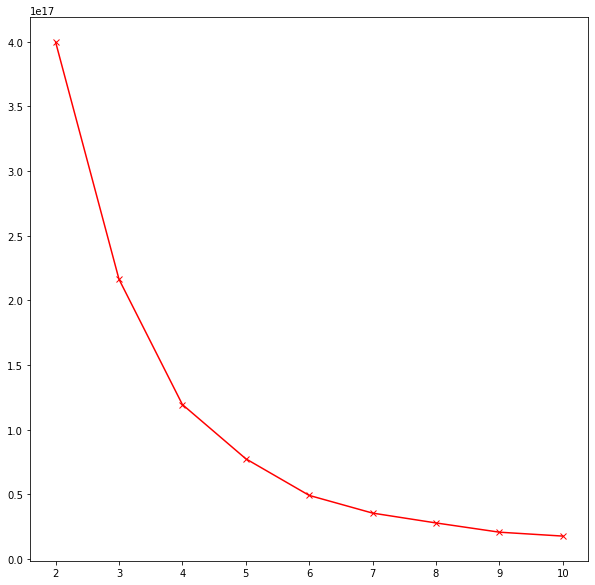

In [28]:
df=pd.get_dummies(df,drop_first=True)
cluster(df,10)

In [ ]:
df_product=pd.get_dummies(df_product,drop_first=True)
cluster(df_product,10)

In [ ]:
df_customer=pd.get_dummies(df_customer,drop_first=True)
cluster(df_customer,10)

In [ ]:
model=KMeans(n_clusters=5)
model=model.fit(df_product)
pred=model.predict(df_product)
df_product['cluster']=pred
df_product.head()

In [ ]:
df_order=pd.get_dummies(df_order,drop_first=True)
cluster(df_order,10)

In [ ]:
model=KMeans(n_clusters=5)
model=model.fit(df_product)
pred=model.predict(df_product)
df_product['cluster']=pred
df_product.head()